<a href="https://colab.research.google.com/github/rawitchp/chordsdotzip-model/blob/master/chordsdotzip_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORT AND SETTINGS***

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install pydub import_ipynb filetype

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00


In [ ]:
# import HERE
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pydub import AudioSegment
import import_ipynb
import IPython.display as ipd
import filetype
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import os
import warnings
import pickle


In [ ]:
# BASE PATH
BASE_PATH = './gdrive/MyDrive/SeniorProject'


warnings.filterwarnings('ignore')

# TEST
# print(sorted(os.listdir(f'{BASE_PATH}/wavfiles/G')))

___________________________________________

# ***EXAMPLE***

In [ ]:
x, sr = librosa.load(f'{BASE_PATH}/wavfiles/G/G_AcousticGuitar_RodrigoMercador_1.wav')
ipd.Audio(x, rate=sr)

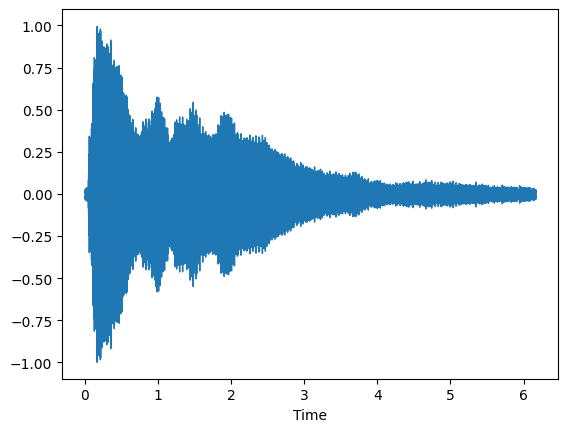

In [ ]:
librosa.display.waveshow(y=x, sr=sr)

12


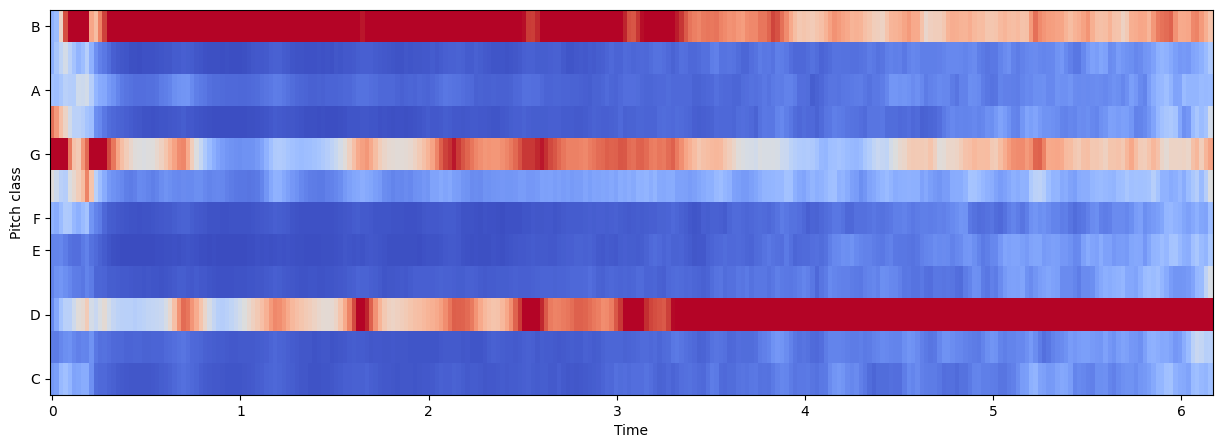

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
print(len(chromagram))

In [ ]:
fmt=filetype.guess(f'{BASE_PATH}/wavfiles/G/G_AcousticGuitar_RodrigoMercador_1.wav').extension
song = AudioSegment.from_file(f'{BASE_PATH}/wavfiles/G/G_AcousticGuitar_RodrigoMercador_1.wav', fmt)
extract = song[3000:3300]
extract.export(f'{BASE_PATH}/test.wav',format='wav')

<_io.BufferedRandom name='./gdrive/MyDrive/SeniorProject/test.wav'>

In [ ]:
x, sr = librosa.load(f'{BASE_PATH}/test.wav')
ipd.Audio(x, rate=sr)

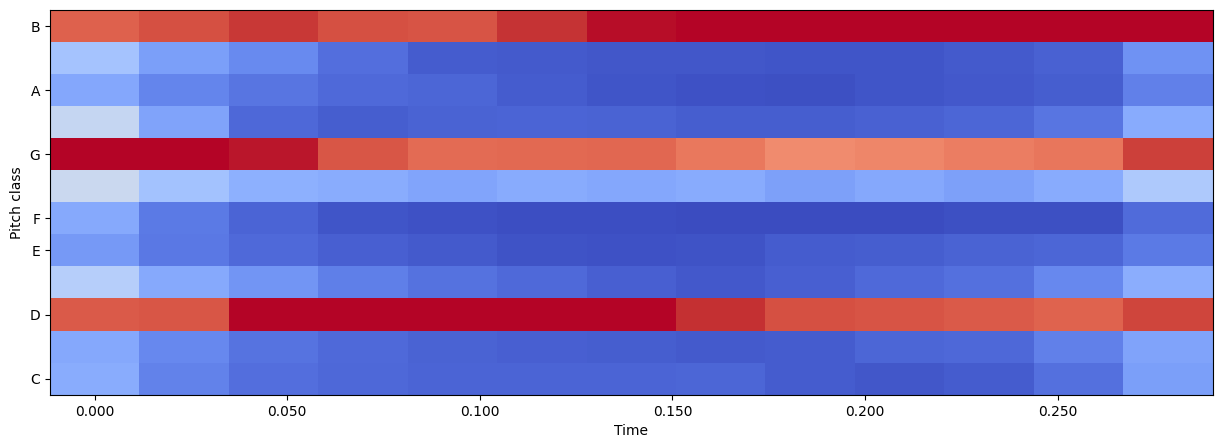

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

___________________________________________

# ***DATASET PREPARATION***

In [ ]:
# ['Am', 'Bb', 'Bdim', 'C', 'Dm', 'Em', 'F', 'G']
chords = sorted(os.listdir(f'{BASE_PATH}/wavfiles'))


chroma_features = []

for i in chords:
  chord_name = i
  print(f'Current Chord: {chord_name}')
  folder_chord = sorted(os.listdir(f'{BASE_PATH}/wavfiles/{chord_name}'))
  for j in folder_chord:
    file_name = j
    x, sr = librosa.load(f'{BASE_PATH}/wavfiles/{chord_name}/{file_name}')
    chroma = librosa.feature.chroma_cqt(y=x, sr=sr)
    arr = []
    for i in range(len(chroma)):
        chroma[i] = sum(chroma[i])/len(chroma[i])
        arr.append(chroma[i][0])
    arr.append(chord_name)
    chroma_features.append(arr)
  print(f'Chord {chord_name} DONE')



# Stack the Chroma features into a 2D array
chroma_features = np.array(chroma_features)
print('All DONE!')


Current Chord: Am
Chord Am DONE
Current Chord: Bb
Chord Bb DONE
Current Chord: Bdim
Chord Bdim DONE
Current Chord: C
Chord C DONE
Current Chord: Dm
Chord Dm DONE
Current Chord: Em
Chord Em DONE
Current Chord: F
Chord F DONE
Current Chord: G
Chord G DONE
All DONE!


In [ ]:
# print(chroma_features)
print(len(chroma_features))
print((chroma_features[6]))
print(len(chroma_features[6]))

1760
['0.22770514' '0.17453144' '0.15563352' '0.16434923' '0.63708544'
 '0.20980686' '0.15843286' '0.19496186' '0.21587668' '0.9365971'
 '0.24245282' '0.25185183' 'Am']
13


In [ ]:
Data = pd.DataFrame(chroma_features)
Data.to_csv(f'{BASE_PATH}/Training_Dataset.csv',header=None,index=False)

____________________________________________________________

# ***Model***

In [ ]:
# data = load_iris()
# X = data.data
# y = data.target
# print("X:",X)
# print("y:",y)


data  = pd.read_csv(f'{BASE_PATH}/Training_Dataset.csv', header=None, index_col=False)
# print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier with "adam" solver and specified number of epochs
model = MLPClassifier(solver='adam', max_iter=1000, verbose=True)  # You can adjust max_iter (epochs) as needed

# Train the classifier
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


filename = f"{BASE_PATH}/Model.sav"
pickle.dump(model, open(filename, 'wb'))



Iteration 1, loss = 2.06722561
Iteration 2, loss = 2.00658656
Iteration 3, loss = 1.95070358
Iteration 4, loss = 1.89426636
Iteration 5, loss = 1.83601456
Iteration 6, loss = 1.77383738
Iteration 7, loss = 1.70822154
Iteration 8, loss = 1.63844737
Iteration 9, loss = 1.56546321
Iteration 10, loss = 1.49109814
Iteration 11, loss = 1.41538234
Iteration 12, loss = 1.33830280
Iteration 13, loss = 1.26028010
Iteration 14, loss = 1.18309432
Iteration 15, loss = 1.10895167
Iteration 16, loss = 1.03800739
Iteration 17, loss = 0.97085074
Iteration 18, loss = 0.90586178
Iteration 19, loss = 0.84376981
Iteration 20, loss = 0.78645948
Iteration 21, loss = 0.73326450
Iteration 22, loss = 0.68367172
Iteration 23, loss = 0.63791216
Iteration 24, loss = 0.59724568
Iteration 25, loss = 0.55905814
Iteration 26, loss = 0.52449052
Iteration 27, loss = 0.49393465
Iteration 28, loss = 0.46559853
Iteration 29, loss = 0.43919453
Iteration 30, loss = 0.41500494
Iteration 31, loss = 0.39328934
Iteration 32, los

In [ ]:
x = 1400
print("X:",X[x:x+1])
print("y:",y[x])

X:            0         1         2         3        4         5         6   \
1400  0.94038  0.087839  0.051734  0.054092  0.10133  0.387689  0.106469   

            7         8         9         10        11  
1400  0.104646  0.048647  0.156485  0.053701  0.110204  
y: F


In [ ]:
# example = [[0.20316,  0.281962,  0.887681,  0.238893,  0.296417,  0.557964,  0.19103, 0.182673,  0.200994,  0.732031,  0.241559,  0.19914, ]]
# ['Dm']

# example = [[0.330893,0.26800892,0.32314122,0.41190535,0.26499206,0.32796067,0.3389977,0.23223649,0.2395959,0.34162086,0.91626483,0.9393476]]
# ['B']

# example = [[0.19619666,0.27605543,0.30604962,0.2933282,0.47011784,0.26551834,0.29465437,0.3017721,0.46297303,1,0.36431563,0.31285572]]
# ['A']

example = [[0.300471 ,0.069887,  0.064773,  0.075422,  0.977424,  0.109927,  0.068845,0.098558,  0.106054,  0.553056,  0.088811,  0.161457]]
# ['Am']
myModel = pickle.load(open(f"{BASE_PATH}/Model.sav", 'rb'))
test_model = myModel.predict(X[x:x+1])
print('test model: ',test_model[0])


test model:  F
